In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import os

In [23]:
# 従来方法の収束速度の読み込み
eval_list = ["eval5", "eval7", "eval12"]
model_list = ["v" + str(i) for i in range(1, 21)]
conv_train_err_speeds = []
conv_test_err_speeds = []

for eval_v in eval_list:
    train_err_speeds = []
    test_err_speeds = []
    for model_v in model_list:
        path = os.path.join("../conventional/eval/result", eval_v, model_v, "err_speed.json")
        with open(path) as f:
            log = json.load(f)
        train_err_speeds.append(log["train_err_speed"])
        test_err_speeds.append(log["test_err_speed"])
    conv_train_err_speeds.append(train_err_speeds)
    conv_test_err_speeds.append(test_err_speeds)

In [24]:
# 提案方法の収束速度の読み込み
# ["eval41", "eval42", "eval43", "eval44", "eval45"]
eval_list = ["eval41","eval44", "eval45"]
model_list = ["v" + str(i) for i in range(1, 21)]
prop_train_err_speeds = []
prop_test_err_speeds = []

for eval_v in eval_list:
    train_err_speeds = []
    test_err_speeds = []
    for model_v in model_list:
        path = os.path.join("../proposal/eval/result", eval_v, model_v, "err_speed.json")
        with open(path) as f:
            log = json.load(f)
        train_err_speeds.append(log["train_err_speed"])
        test_err_speeds.append(log["test_err_speed"])
    prop_train_err_speeds.append(train_err_speeds)
    prop_test_err_speeds.append(test_err_speeds)

In [27]:
from collections import defaultdict

points = [4,8,15]
conv_train_sample_clusters = defaultdict(list)
prop_train_sample_clusters = defaultdict(list)
conv_test_sample_clusters = defaultdict(list)
prop_test_sample_clusters = defaultdict(list)

for i, point in enumerate(points):
    start = 0 if i == 0 else points[i-1]
    end = points[i]
    for index in range(3):
        conv_train_sample_clusters[i] += conv_train_err_speeds[index][start:end]
        prop_train_sample_clusters[i] += prop_train_err_speeds[index][start:end]
        conv_test_sample_clusters[i] += conv_test_err_speeds[index][start:end]
        prop_test_sample_clusters[i] += prop_test_err_speeds[index][start:end]

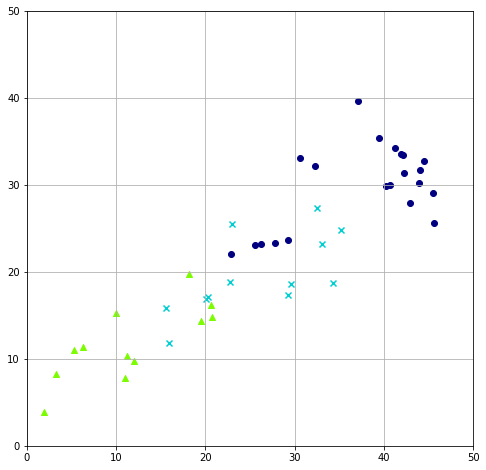

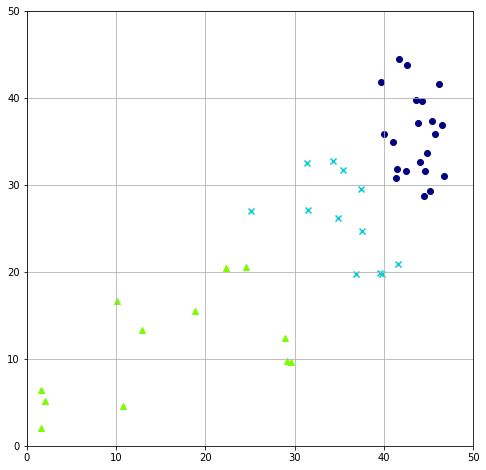

In [28]:
fig1 = plt.figure(figsize=(8,8))
plt.scatter(conv_train_sample_clusters[0], conv_test_sample_clusters[0], c="lawngreen", marker="^")
plt.scatter(conv_train_sample_clusters[1], conv_test_sample_clusters[1], c="darkturquoise", marker="x")
plt.scatter(conv_train_sample_clusters[2], conv_test_sample_clusters[2], c="navy")
plt.xlim(0, 50)
plt.ylim(0, 50)
plt.grid(True)

fig2 = plt.figure(figsize=(8,8))
plt.scatter(prop_train_sample_clusters[0], prop_test_sample_clusters[0], c="lawngreen", marker="^")
plt.scatter(prop_train_sample_clusters[1], prop_test_sample_clusters[1], c="darkturquoise", marker="x")
plt.scatter(prop_train_sample_clusters[2], prop_test_sample_clusters[2], c="navy")
plt.xlim(0, 50)
plt.ylim(0, 50)
plt.grid(True)

In [36]:
# 重心を求める
conv_train_grav_centers = []
conv_test_grav_centers = []
prop_train_grav_centers = []
prop_test_grav_centers = []

def cal_grav_center(samples):
    grav_center = sum(samples)/len(samples)
    return grav_center

for index in range(3):
    conv_train_grav_centers.append(cal_grav_center(conv_train_sample_clusters[index]))
    conv_test_grav_centers.append(cal_grav_center(conv_test_sample_clusters[index]))
    prop_train_grav_centers.append(cal_grav_center(prop_train_sample_clusters[index]))
    prop_test_grav_centers.append(cal_grav_center(prop_test_sample_clusters[index]))

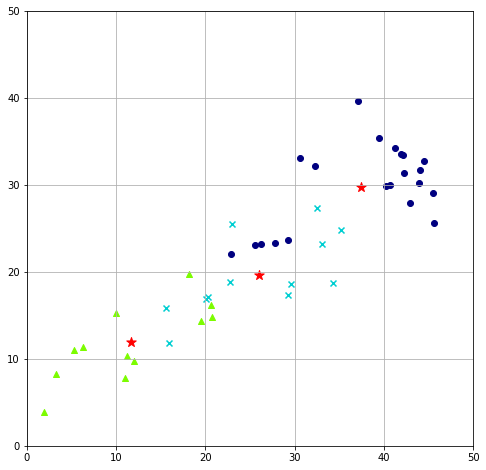

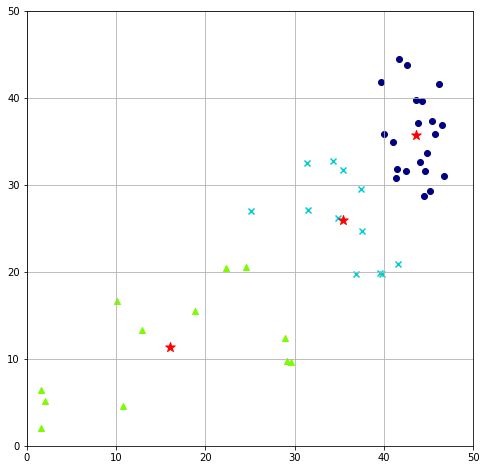

In [43]:
# 重心を追加

fig1 = plt.figure(figsize=(8,8))

plt.scatter(conv_train_sample_clusters[0], conv_test_sample_clusters[0], c="lawngreen", marker="^")
plt.scatter(conv_train_sample_clusters[1], conv_test_sample_clusters[1], c="darkturquoise", marker="x")
plt.scatter(conv_train_sample_clusters[2], conv_test_sample_clusters[2], c="navy")

plt.scatter(conv_train_grav_centers[0], conv_test_grav_centers[0], s=100, c="red", marker="*")
plt.scatter(conv_train_grav_centers[1], conv_test_grav_centers[1], s=100, c="red", marker="*")
plt.scatter(conv_train_grav_centers[2], conv_test_grav_centers[2], s=100, c="red", marker="*")

plt.xlim(0, 50)
plt.ylim(0, 50)
plt.grid(True)

fig2 = plt.figure(figsize=(8,8))

plt.scatter(prop_train_sample_clusters[0], prop_test_sample_clusters[0], c="lawngreen", marker="^")
plt.scatter(prop_train_sample_clusters[1], prop_test_sample_clusters[1], c="darkturquoise", marker="x")
plt.scatter(prop_train_sample_clusters[2], prop_test_sample_clusters[2], c="navy")

plt.scatter(prop_train_grav_centers[0], prop_test_grav_centers[0], s=100, c="red", marker="*")
plt.scatter(prop_train_grav_centers[1], prop_test_grav_centers[1], s=100, c="red", marker="*")
plt.scatter(prop_train_grav_centers[2], prop_test_grav_centers[2], s=100, c="red", marker="*")

plt.xlim(0, 50)
plt.ylim(0, 50)
plt.grid(True)

In [45]:
print("従来方法:")
print("訓練誤差収束速度のデータ数ごとの重心: {0}".format(conv_train_grav_centers))
print("汎化誤差収束速度のデータ数ごとの重心: {0}".format(conv_test_grav_centers))
print("提案方法:")
print("訓練誤差収束速度のデータ数ごとの重心: {0}".format(prop_train_grav_centers))
print("汎化誤差収束速度のデータ数ごとの重心: {0}".format(prop_test_grav_centers))

従来方法:
訓練誤差収束速度のデータ数ごとの重心: [11.671973537082081, 25.95279403284717, 37.433377835798574]
汎化誤差収束速度のデータ数ごとの重心: [11.90475175168359, 19.663655445507036, 29.778466261848685]
提案方法:
訓練誤差収束速度のデータ数ごとの重心: [16.031827355516544, 35.440414762308386, 43.59225365129649]
汎化誤差収束速度のデータ数ごとの重心: [11.364826505566825, 25.960939580969505, 35.72209377623649]


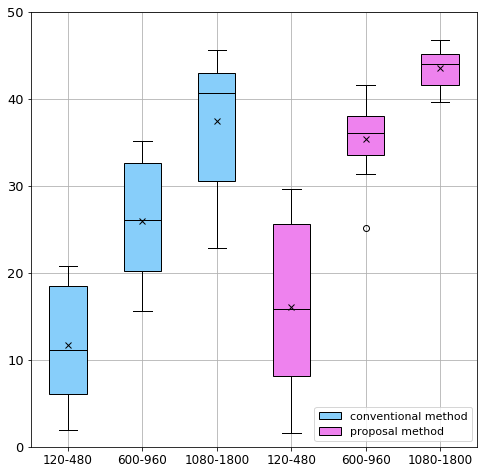

In [81]:
# 訓練誤差収束速度　箱ひげ図

data = []
for index in range(3):
    data.append(conv_train_sample_clusters[index])
for index in range(3):
    data.append(prop_train_sample_clusters[index])

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
bp = ax.boxplot(data,
                patch_artist=True,
                medianprops=dict(color='black', linewidth=1),
                showmeans=True,
                meanprops=dict(marker="x", markeredgecolor='k'))

plt.xticks([1,2,3,4,5,6], ["120-480", "600-960", "1080-1800","120-480", "600-960", "1080-1800"], fontsize=12)
plt.yticks(fontsize=13)

colors = ["#87cefa"] * 3 + ["#ee82ee"] * 3
for b, c in zip(bp['boxes'], colors):
    b.set(color='black', linewidth=1)  # boxの外枠の色
    b.set(facecolor = c)

ax.legend([bp["boxes"][0], bp["boxes"][3]], ['conventional method', 'proposal method'], loc='lower right', fontsize=11)
plt.ylim(0,50)
plt.grid(True)

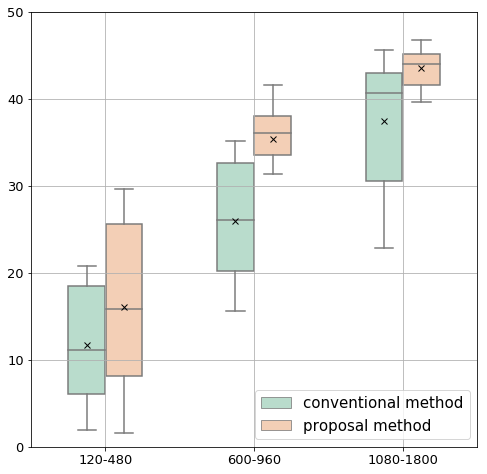

In [122]:
# 訓練誤差収束速度　箱ひげ図

from collections import defaultdict
import seaborn as sns
import pandas

data = defaultdict(list)
labels = ["120-480", "600-960", "1080-1800"]

for index in range(3):
    for conv_err_speed in conv_train_sample_clusters[index]:
        data["method"].append("conventional method")
        data["test_err_speed"].append(conv_err_speed)
        data["train_dataN"].append(labels[index])
    for prop_err_speed in prop_train_sample_clusters[index]:
        data["method"].append("proposal method")
        data["test_err_speed"].append(prop_err_speed)
        data["train_dataN"].append(labels[index])

df = pd.DataFrame(data)

fig = plt.figure(figsize=(8,8))
sns.boxplot(x='train_dataN',
            y='test_err_speed',
            data=df, hue='method', palette='Pastel2',
            width=0.5,
            showmeans=True,
            meanprops=dict(marker="x", markeredgecolor='k'),
            sym="")

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylim(0,50)
plt.grid(True)
plt.xlabel("")
plt.ylabel("")
plt.legend(loc='lower right', fontsize=15)
plt.show()

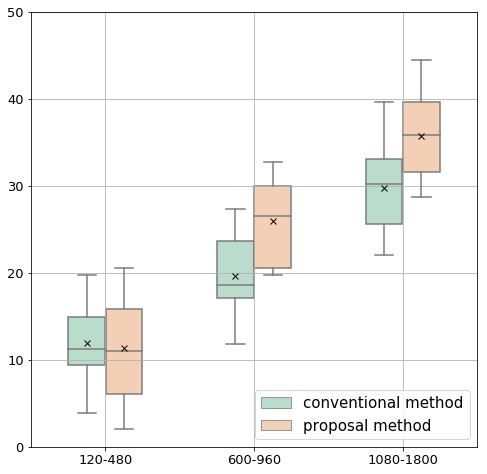

In [123]:
# 汎化誤差収束速度　箱ひげ図

from collections import defaultdict
import seaborn as sns
import pandas

data = defaultdict(list)
labels = ["120-480", "600-960", "1080-1800"]

for index in range(3):
    for conv_err_speed in conv_test_sample_clusters[index]:
        data["method"].append("conventional method")
        data["test_err_speed"].append(conv_err_speed)
        data["train_dataN"].append(labels[index])
    for prop_err_speed in prop_test_sample_clusters[index]:
        data["method"].append("proposal method")
        data["test_err_speed"].append(prop_err_speed)
        data["train_dataN"].append(labels[index])

df = pd.DataFrame(data)

fig = plt.figure(figsize=(8,8))
sns.boxplot(x='train_dataN',
            y='test_err_speed',
            data=df, hue='method', palette='Pastel2',
            width=0.5,
            showmeans=True,
            meanprops=dict(marker="x", markeredgecolor='k'))

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylim(0,50)
plt.grid(True)
plt.xlabel("")
plt.ylabel("")
plt.legend(loc='lower right', fontsize=15)
plt.show()